# MadMiner particle physics tutorial

# Part 4b: The Fisher information

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import six
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d


In [7]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [8]:
fisher = FisherInformation('data/lhe_data_shuffled.h5')
# fisher = FisherInformation('data/delphes_data_shuffled.h5')

13:40 madminer.analysis    INFO    Loading data from data/lhe_data_shuffled.h5
13:40 madminer.analysis    INFO    Found 2 parameters
13:40 madminer.analysis    INFO    Did not find nuisance parameters
13:40 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
13:40 madminer.analysis    INFO    Found 3 observables
13:40 madminer.analysis    INFO    Found 14839 events
13:40 madminer.analysis    INFO    Found morphing setup with 6 components


This class provides different functions:
- `calculate_fisher_information_rate()` calculates the Fisher information in total rates,
- `calculate_fisher_information_hist1d()` calculates the Fisher information in 1D histograms,
- `calculate_fisher_information_hist2d()` calculates the Fisher information in 2D histograms,
- `calculate_fisher_information_full_detector()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `calculate_fisher_information_full_truth()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [9]:
fisher_information, _ = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.],
    model_file='models/sally',
    luminosity=10000.
)

print('Kinematic Fisher information after 10 ifb:\n{}'.format(fisher_information))

13:40 madminer.fisherinfor INFO    Found 2 parameters in SALLY model, matching 2 physical parameters in MadMiner file
13:40 madminer.fisherinfor INFO    Evaluating rate Fisher information
13:40 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1


Kinematic Fisher information after 10 ifb:
[[1.3066736  0.23852066]
 [0.23852066 1.17390159]]


## 2. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

/Users/johannbrehmer/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/Users/johannbrehmer/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


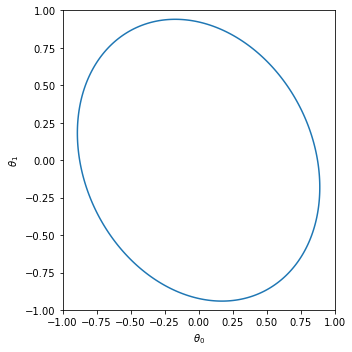

In [10]:
_ = plot_fisher_information_contours_2d(
    [fisher_information],
    xrange=(-1,1),
    yrange=(-1,1)
)